# Support Vector Machine (SVM)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import make_normal_data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## Dados Sintéticos

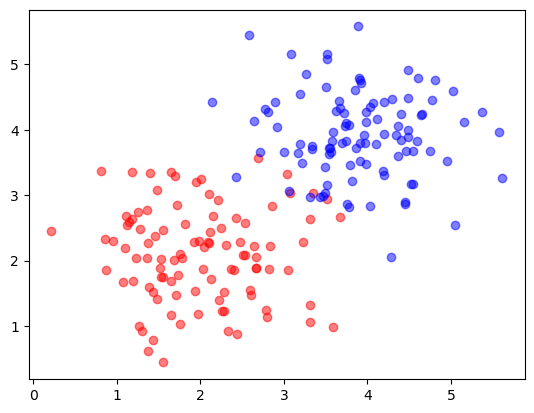

In [3]:
np.random.seed(0)

s1 = 0.7
s2 = 0.7
c1 = np.array([2,2])
c2 = np.array([4,4])
n1 = 100
n2 = 100
x1, y1 = make_normal_data(s = s1, n = n1, c = c1, dim = 2, label = 1)
x2, y2 = make_normal_data(s = s2, n = n2, c = c2, dim = 2, label = -1)
xall = np.vstack((x1, x2))
yall = np.hstack((y1, y2))
plt.plot(x1[:,0], x1[:,1], 'ro', label = 'class 1',  alpha = 0.5)
plt.plot(x2[:,0], x2[:,1], 'bo', label = 'class 2',  alpha = 0.5)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(xall, yall, test_size=0.3)

model = SVC(kernel='rbf', C=10, gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.91      1.00      0.95        31
         1.0       1.00      0.90      0.95        29

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



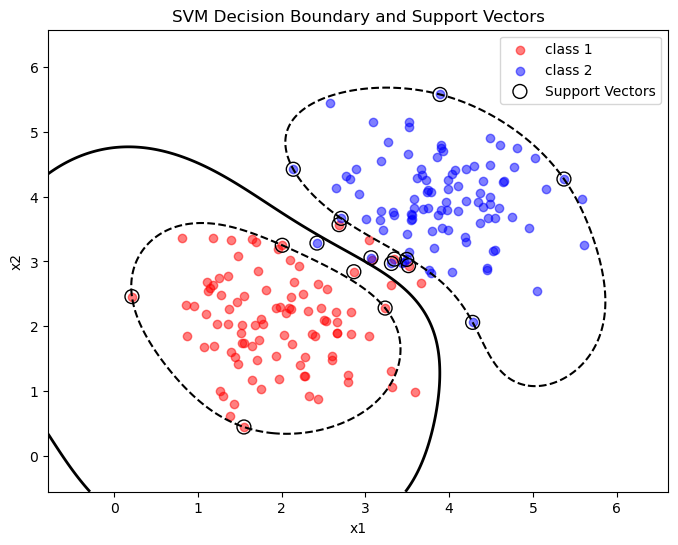

In [5]:
# Plot decision boundary and support vectors
plt.figure(figsize=(8,6))
plt.scatter(x1[:,0], x1[:,1], c='red', label='class 1', alpha=0.5)
plt.scatter(x2[:,0], x2[:,1], c='blue', label='class 2', alpha=0.5)

# Create grid to evaluate model
xx, yy = np.meshgrid(
    np.linspace(xall[:,0].min()-1, xall[:,0].max()+1, 300),
    np.linspace(xall[:,1].min()-1, xall[:,1].max()+1, 300)
)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--', '--'], colors='k')

# Plot support vectors
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.title('SVM Decision Boundary and Support Vectors')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

/tmp/ipykernel_9718/1480554961.py:15: RuntimeWarning: divide by zero encountered in divide
  kall = np.exp(-(dall**2) / (2 * h**2))        # shape (100,100)
/tmp/ipykernel_9718/1480554961.py:15: RuntimeWarning: invalid value encountered in divide
  kall = np.exp(-(dall**2) / (2 * h**2))        # shape (100,100)


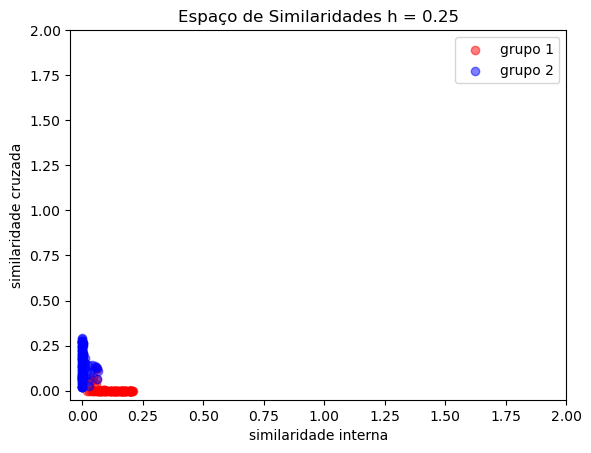

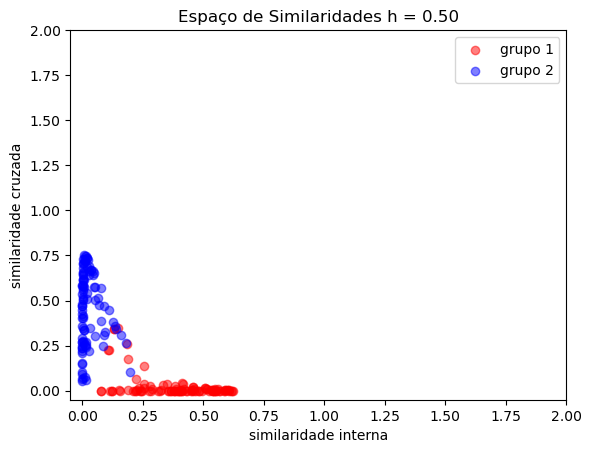

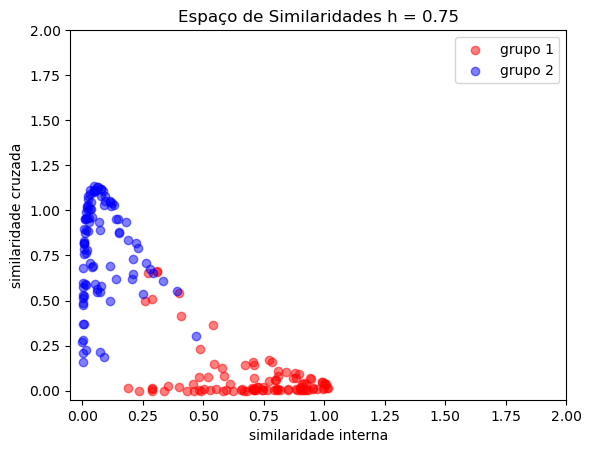

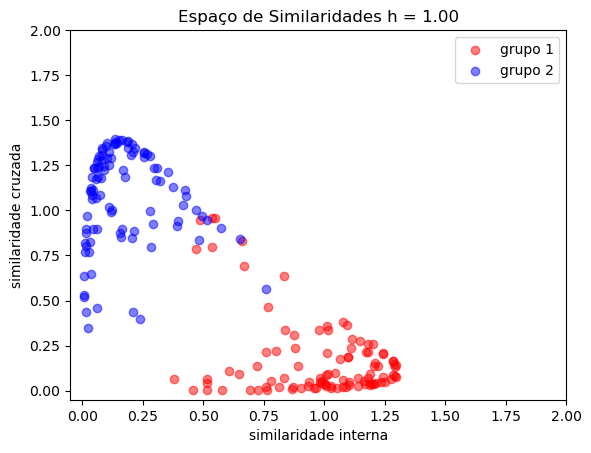

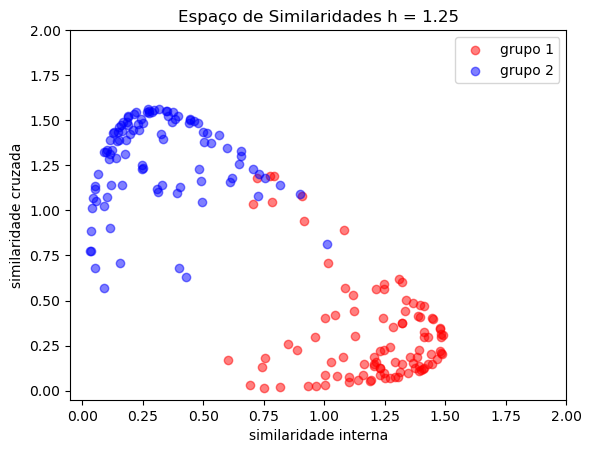

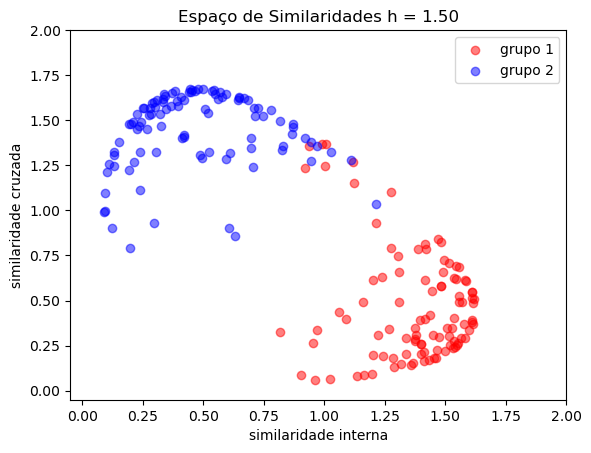

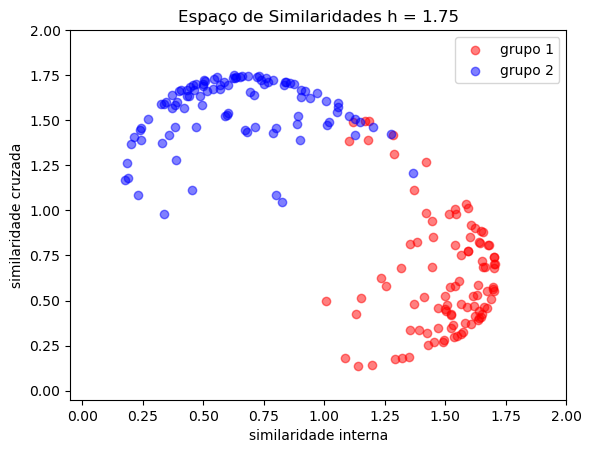

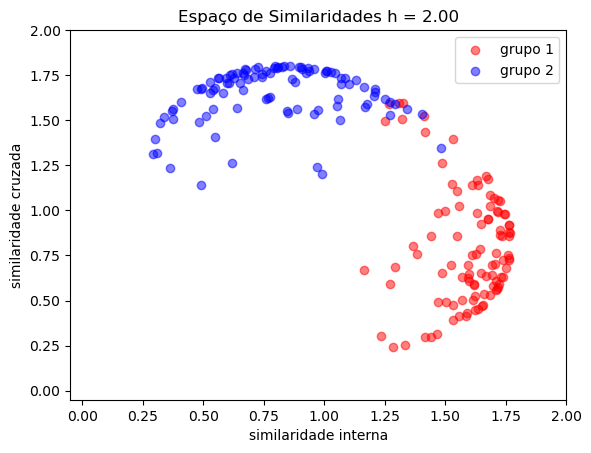

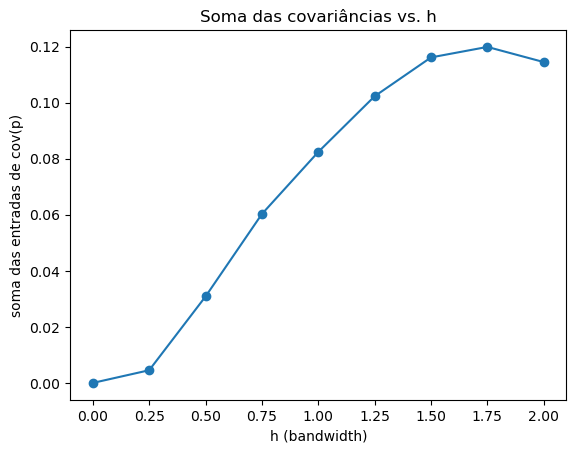

In [24]:
from scipy.spatial import distance_matrix
# xin: seu array de dados, shape (100, d)
# seqh: lista ou array dos valores de h a testar
# Exemplo de inicialização:
# xin = np.random.random((100, d))
seqh = np.linspace(0.0, 2.0, 9)

sumcov = np.zeros(len(seqh))

for idx, h in enumerate(seqh):
    # 1) matriz de distâncias euclideanas entre todos os pares
    dall = distance_matrix(xall, xall)              # shape (100,100)

    # 2) matriz de kernel Gaussiano
    kall = np.exp(-(dall**2) / (2 * h**2))        # shape (100,100)

    # 3) particionando em dois grupos de 50 observações
    k11 = kall[  :100,   :100]   # similaridade dentro do grupo 1
    k12 = kall[  :100, 100:  ]   # similaridade de grupo 1 para 2
    k21 = kall[100:  ,   :100]   # similaridade de grupo 2 para 1
    k22 = kall[100:  , 100:  ]   # similaridade dentro do grupo 2

    # 4) soma das linhas (grau de similaridade) em cada submatriz
    p11 = k11.sum(axis=1)
    p12 = k12.sum(axis=1)
    p21 = k21.sum(axis=1)
    p22 = k22.sum(axis=1)

    # 5) construindo os vetores p1 e p2 e normalizando por 50
    p1 = np.column_stack((p11, p12)) / 50.0  # shape (50,2)
    p2 = np.column_stack((p21, p22)) / 50.0  # shape (50,2)

    # 6) plot de p1 em vermelho e p2 em azul (limites fixos [0,1]×[0,1])
    if h == 0.0:
        continue
    plt.scatter(p1[:,0], p1[:,1], c='red',   label='grupo 1', alpha=0.5)
    plt.scatter(p2[:,0], p2[:,1], c='blue',  label='grupo 2', alpha=0.5)
    plt.xlim(-0.05, 2)
    plt.ylim(-0.05, 2)
    plt.title(f'Espaço de Similaridades h = {h:.2f}')
    plt.xlabel('similaridade interna')
    plt.ylabel('similaridade cruzada')
    plt.legend()
    plt.show()

    # 7) soma das covariâncias de todos os pontos concatenados
    pall = np.vstack((p1, p2))            # shape (100,2)
    cov = np.cov(pall, rowvar=False)      # matriz 2×2
    sumcov[idx] = cov.sum()               # soma dos 4 elementos

# 8) plot final: sumcov em função do índice de seqh
plt.figure()
plt.plot(seqh, sumcov, marker='o')
plt.title('Soma das covariâncias vs. h')
plt.xlabel('h (bandwidth)')
plt.ylabel('soma das entradas de cov(p)')
plt.show()
